In [147]:
# Main imports established
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Descriptive and target features established
desc_features=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
target='stroke'

# Preprocessed data read from a csv file and displayed in a DataFrame
df=pd.read_csv('preprocessed.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0.04,0.0,0.0,No,children,Rural,Normal,Underweight,never smoked,0.0
1,Male,0.71,1.0,0.0,Yes,Private,Urban,Normal,Obesity,never smoked,0.0
2,Female,0.10,0.0,0.0,No,Private,Urban,Prediabetes,Underweight,never smoked,0.0
3,Female,0.85,0.0,0.0,Yes,Private,Rural,Normal,Obesity,formerly smoked,0.0
4,Male,0.17,0.0,0.0,No,Never_worked,Rural,Diabetes,Healthy,never smoked,0.0
...,...,...,...,...,...,...,...,...,...,...,...
43384,Female,0.12,0.0,0.0,No,children,Urban,Normal,Healthy,never smoked,0.0
43385,Female,0.68,0.0,0.0,Yes,Govt_job,Urban,Diabetes,Obesity,formerly smoked,0.0
43386,Female,1.00,1.0,0.0,Yes,Private,Urban,Normal,Overweight,formerly smoked,0.0
43387,Male,0.49,0.0,0.0,Yes,Private,Urban,Normal,Obesity,never smoked,0.0


In [148]:
# Checking to make sure there are no missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [149]:
# Splitting the data into training and testing (33% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df[desc_features],df[target],test_size=.33,random_state=0)

In [150]:
# Checking that the train test split executed properly
print("Y_train class count:\n", Y_train.value_counts(), "\n\nY_test class count:\n", Y_test.value_counts())

Y_train class count:
 stroke
0.0    28539
1.0      531
Name: count, dtype: int64 

Y_test class count:
 stroke
0.0    14067
1.0      252
Name: count, dtype: int64


In [151]:
# Over Sampling for training set
from imblearn.over_sampling import RandomOverSampler
OverSampled=RandomOverSampler(random_state=0)
X_train, Y_train=OverSampled.fit_resample(X_train, Y_train)

pd.DataFrame(Y_train)

,stroke
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
57073,1.0
57074,1.0
57075,1.0
57076,1.0


In [152]:
# Checking that there are the same amount of instances for each class in the Y_train set
Y_train.value_counts()

stroke
0.0    28539
1.0    28539
Name: count, dtype: int64

In [153]:
# Features training set
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,0.95,1.0,1.0,Yes,Self-employed,Urban,Diabetes,Obesity,formerly smoked
1,Female,0.69,0.0,0.0,Yes,Private,Urban,Normal,Overweight,never smoked
2,Male,0.21,0.0,0.0,No,Private,Urban,Prediabetes,Healthy,never smoked
3,Female,0.88,0.0,0.0,Yes,Private,Rural,Normal,Obesity,never smoked
4,Female,0.26,0.0,0.0,No,Private,Urban,Normal,Obesity,smokes
...,...,...,...,...,...,...,...,...,...,...
57073,Male,0.93,0.0,0.0,Yes,Private,Urban,Prediabetes,Healthy,never smoked
57074,Male,0.72,0.0,0.0,Yes,Govt_job,Rural,Diabetes,Obesity,formerly smoked
57075,Male,0.95,0.0,0.0,Yes,Self-employed,Rural,Normal,Healthy,never smoked
57076,Male,1.00,0.0,0.0,Yes,Private,Rural,Prediabetes,Healthy,never smoked


In [154]:
# Features testing set
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
30659,Male,0.60,0.0,0.0,Yes,Private,Urban,Prediabetes,Healthy,never smoked
32299,Male,0.62,0.0,0.0,Yes,Private,Urban,Normal,Healthy,smokes
42286,Female,0.43,0.0,0.0,No,Private,Urban,Normal,Obesity,smokes
16600,Female,0.30,0.0,0.0,No,Private,Rural,Diabetes,Obesity,never smoked
21285,Male,0.79,1.0,0.0,Yes,Govt_job,Rural,Diabetes,Obesity,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
20206,Female,0.51,1.0,0.0,Yes,Private,Urban,Diabetes,Obesity,formerly smoked
6192,Male,0.82,0.0,0.0,Yes,Self-employed,Urban,Prediabetes,Overweight,never smoked
29981,Female,0.10,0.0,0.0,No,children,Urban,Normal,Overweight,never smoked
5921,Female,0.27,0.0,0.0,Yes,Private,Rural,Prediabetes,Healthy,never smoked


In [155]:
# Target testing set
pd.DataFrame(Y_test)

,stroke
30659,0.0
32299,0.0
42286,0.0
16600,0.0
21285,0.0
...,...
20206,0.0
6192,0.0
29981,0.0
5921,0.0


In [156]:
# Categorical features made into continuous in the training and testing sets through encoding
from sklearn.preprocessing import OrdinalEncoder

cat_features=['gender', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']

enc=OrdinalEncoder()

enc.fit(X_train[cat_features])
X_train[cat_features]=enc.transform(X_train[cat_features])

enc.fit(X_test[cat_features])
X_test[cat_features]=enc.transform(X_test[cat_features])

In [157]:
# Normalization of training and testing sets
from sklearn.preprocessing import MinMaxScaler

NormalizedDF=MinMaxScaler().fit(X_train)
X_train=NormalizedDF.transform(X_train)
X_train=X_train.round(2)

NormalizedDF=MinMaxScaler().fit(X_test)
X_test=NormalizedDF.transform(X_test)
X_test=X_test.round(2)

In [158]:
# Checking to make sure there are no missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [159]:
# Descriptive Features training set after encoding and normalizing
pd.DataFrame(X_train, columns=desc_features)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.95,1.0,1.0,1.0,0.75,1.0,0.0,0.33,0.0
1,0.0,0.69,0.0,0.0,1.0,0.50,1.0,0.5,0.67,0.5
2,1.0,0.21,0.0,0.0,0.0,0.50,1.0,1.0,0.00,0.5
3,0.0,0.88,0.0,0.0,1.0,0.50,0.0,0.5,0.33,0.5
4,0.0,0.26,0.0,0.0,0.0,0.50,1.0,0.5,0.33,1.0
...,...,...,...,...,...,...,...,...,...,...
57073,1.0,0.93,0.0,0.0,1.0,0.50,1.0,1.0,0.00,0.5
57074,1.0,0.72,0.0,0.0,1.0,0.00,0.0,0.0,0.33,0.0
57075,1.0,0.95,0.0,0.0,1.0,0.75,0.0,0.5,0.00,0.5
57076,1.0,1.00,0.0,0.0,1.0,0.50,0.0,1.0,0.00,0.5


In [160]:
# Descriptive Features testing set after encoding and normalizing
pd.DataFrame(X_test, columns=desc_features)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.60,0.0,0.0,1.0,0.50,1.0,1.0,0.00,0.5
1,1.0,0.62,0.0,0.0,1.0,0.50,1.0,0.5,0.00,1.0
2,0.0,0.43,0.0,0.0,0.0,0.50,1.0,0.5,0.33,1.0
3,0.0,0.30,0.0,0.0,0.0,0.50,0.0,0.0,0.33,0.5
4,1.0,0.79,1.0,0.0,1.0,0.00,0.0,0.0,0.33,0.0
...,...,...,...,...,...,...,...,...,...,...
14314,0.0,0.51,1.0,0.0,1.0,0.50,1.0,0.0,0.33,0.0
14315,1.0,0.82,0.0,0.0,1.0,0.75,1.0,1.0,0.67,0.5
14316,0.0,0.10,0.0,0.0,0.0,1.00,1.0,0.5,0.67,0.5
14317,0.0,0.27,0.0,0.0,1.0,0.50,0.0,1.0,0.00,0.5


Log Reg Accuracy: 0.74
f1 score: 0.10
ROC Index: 0.76

Confusion Matrix:
        0     1
0  10458  3609
1     56   196

Confusion Matrix Display:


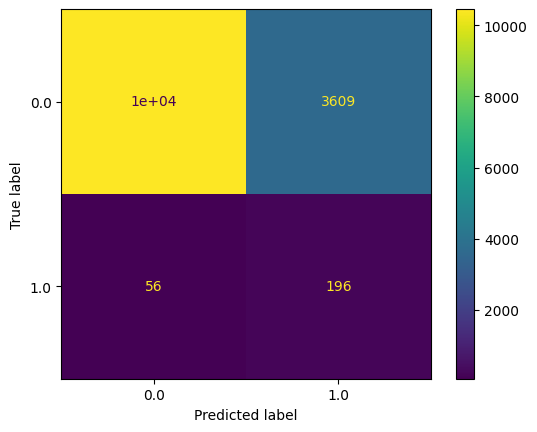

In [161]:
# Error Based Learning: Logistic Regression

# Imports for the metrics used, logistic regression, and ordinal encoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Logistic Regression applied to the training set
Logreg=LogisticRegression()
Logreg.fit(X_train,Y_train)

# target prediction made
y_pred_Logreg=Logreg.predict(X_test)

# Metrics displayed
print("Log Reg Accuracy: {0:.2f}".format(accuracy_score(Y_test,y_pred_Logreg)))
print("f1 score: {0:.2f}".format(f1_score(Y_test, y_pred_Logreg)))
print("ROC Index: {0:.2f}\n".format(roc_auc_score(Y_test, y_pred_Logreg)))

# Confusion Matrix
cm=confusion_matrix(Y_test, y_pred_Logreg)
cm_df=pd.DataFrame(cm)
print("Confusion Matrix:\n", cm_df)

# Confusion Matrix Display
print("\nConfusion Matrix Display:")
CM_DF_Disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(Logreg.classes_))
CM_DF_Disp.plot()
plt.show()

In [162]:
# Weights of each feature for a line of best fit with a multivariable function
coef=pd.DataFrame(Logreg.coef_, columns=desc_features).round(2)
coef

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.16,6.17,0.34,0.86,0.22,0.14,0.04,-0.65,-0.12,0.12


NB Accuracy: 0.73
f1 score: 0.09
ROC Index: 0.75

Confusion Matrix:
        0     1
0  10206  3861
1     56   196

Confusion Matrix Display:


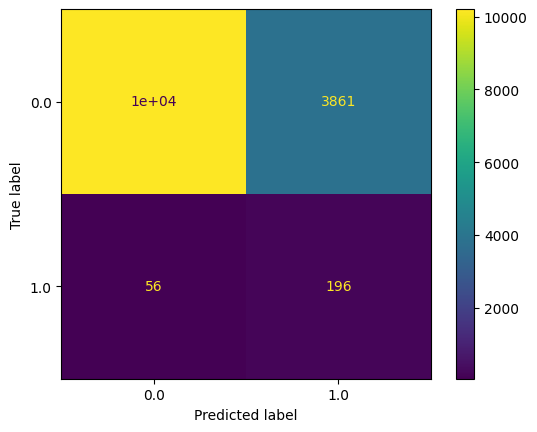

In [163]:
# Probability Based Learning: Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model applied to the training set
_nbc=GaussianNB(priors=None)
_nbc.fit(X_train,Y_train)

# Target prediction made
y_pred_nbc=_nbc.predict(X_test)

# Metrics applied
print("NB Accuracy: {0:.2f}".format(accuracy_score(Y_test,y_pred_nbc)))
print("f1 score: {0:.2f}".format(f1_score(Y_test, y_pred_nbc)))
print("ROC Index: {0:.2f}\n".format(roc_auc_score(Y_test, y_pred_nbc)))

# Confusion Matrix
cm=confusion_matrix(Y_test,y_pred_nbc, labels=_nbc.classes_)
cm_df=pd.DataFrame(cm)
print("Confusion Matrix:\n", cm_df)

# Confusion Matrix Display
print("\nConfusion Matrix Display:")
CM_DF_Disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=_nbc.classes_)
CM_DF_Disp.plot()
plt.show()

In [164]:
# Priors displayed which is the probability of each class in the target feature
cp=pd.DataFrame(_nbc.class_prior_).style.format(precision=2)
cp

,0
0,0.50
1,0.50


/Users/davidespinosa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AB Accuracy: 0.66
f1 score: 0.08
ROC Index: 0.75

Confusion Matrix:
       0     1
0  9286  4781
1    39   213

Confusion Matrix Display:


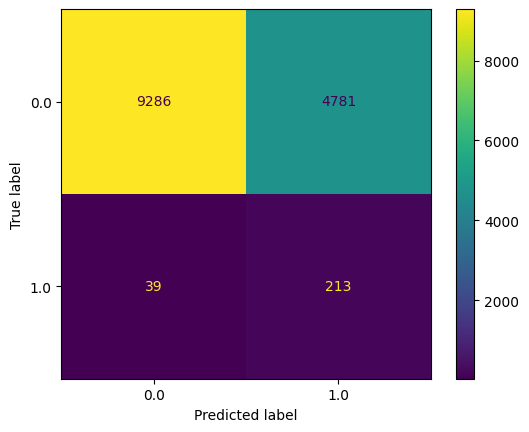

In [165]:
# Information Based Learning: Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting Ensemble established using DecisionTreeClassifier as the base estimator
Abc=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=4)
Abc.fit(X_train, Y_train)

# Target is predicted
y_pred_Abc=Abc.predict(X_test)

# Metrics displayed
print("AB Accuracy: {0:.2f}".format(accuracy_score(Y_test, y_pred_Abc)))
print("f1 score: {0:.2f}".format(f1_score(Y_test, y_pred_Abc)))
print("ROC Index: {0:.2f}\n".format(roc_auc_score(Y_test, y_pred_Abc)))

# Confusion Matrix
cm=confusion_matrix(Y_test, y_pred_Abc)
cm_df=pd.DataFrame(cm)
print("Confusion Matrix:\n", cm_df)

# Confusion Matrix Display
print("\nConfusion Matrix Display:")
CM_DF_Disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Abc.classes_)
CM_DF_Disp.plot()
plt.show()

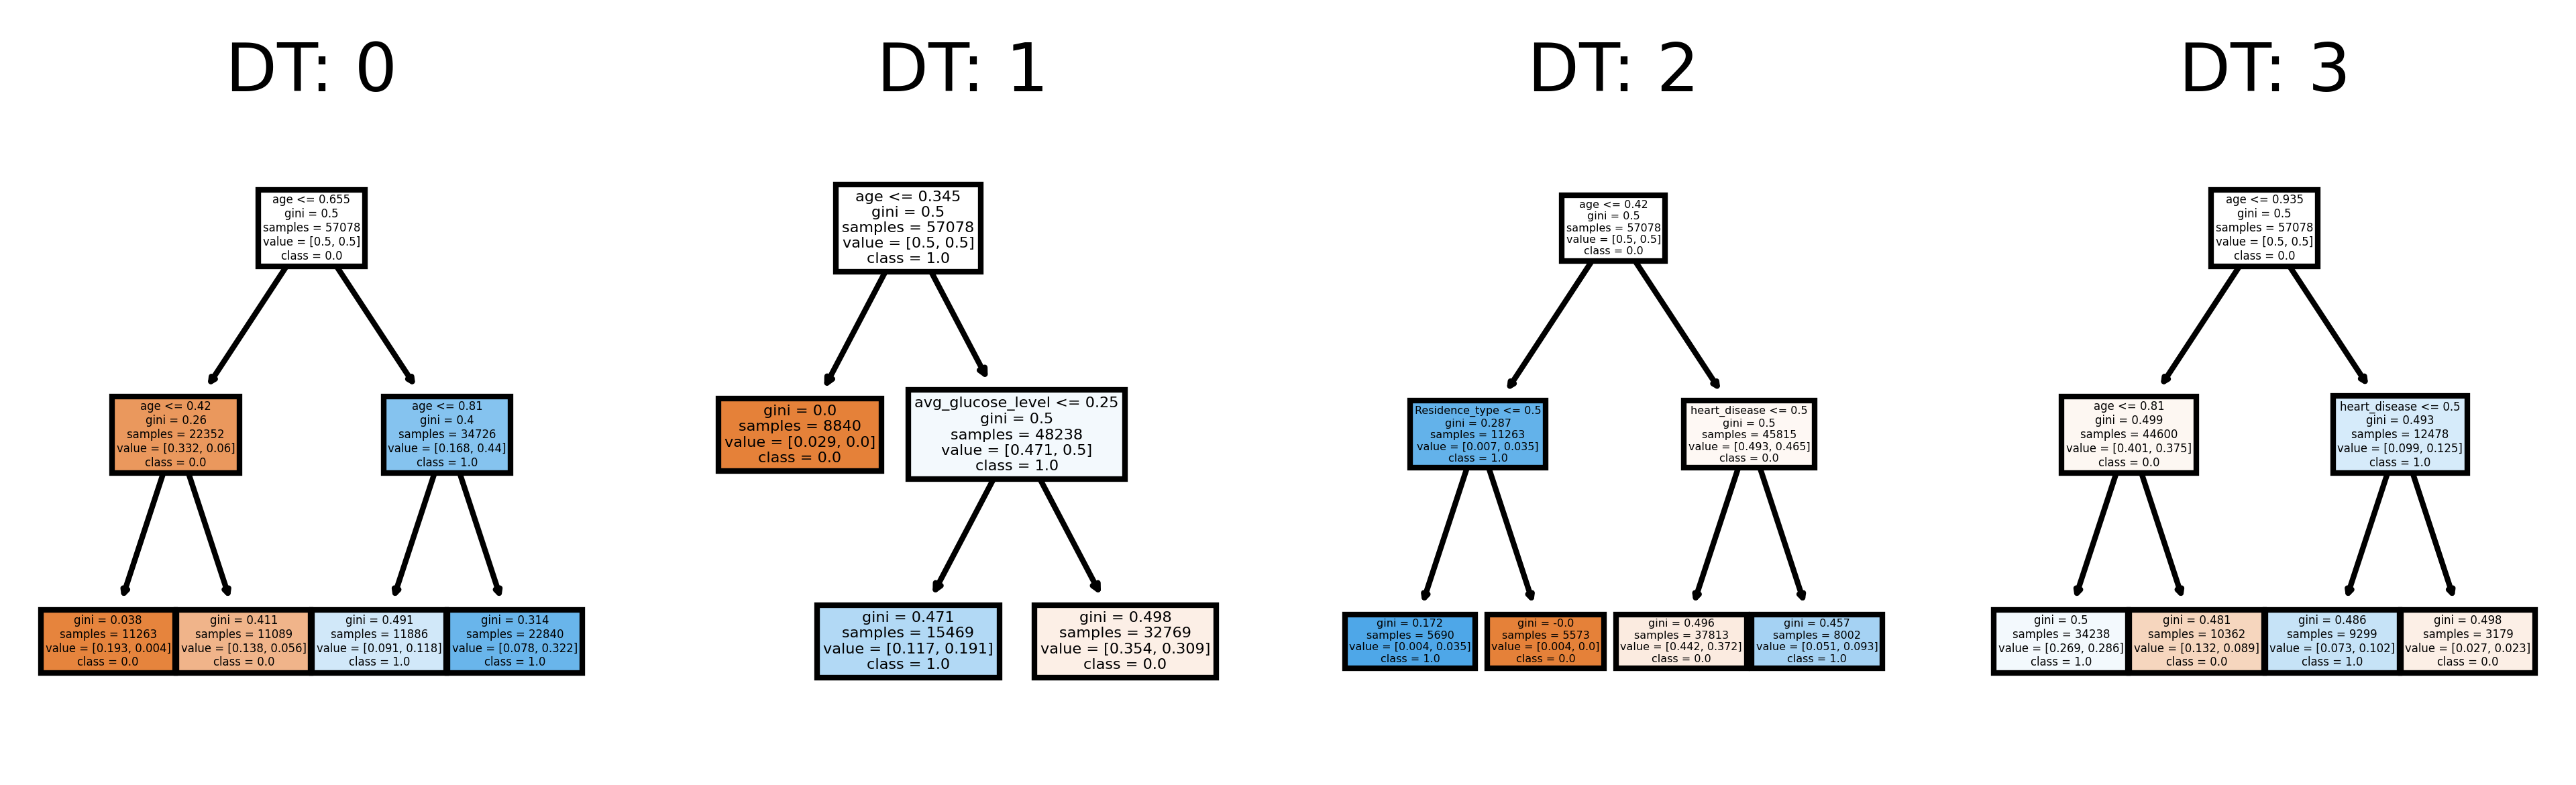

In [166]:
# Set of trees made from a few subsamples of the data and by averaging, the accuracy is improved and over-fitting is prevented
from sklearn import tree

fig, axes=plt.subplots(nrows=1, ncols=4, figsize=(8,2), dpi=600)
for i in range(4):
    tree.plot_tree(Abc.estimators_[i], feature_names=desc_features, class_names=Y_train.unique().astype(str), filled=True, ax=axes[i])
    axes[i].set_title('DT: '+str(i))

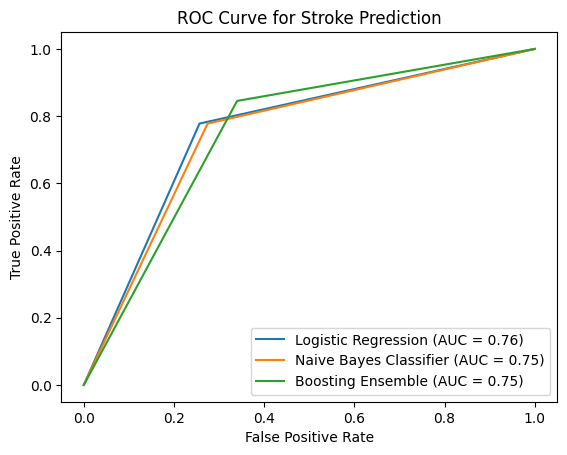

In [167]:
# ROC Curves made for the 3 Machine Learning models used
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# ROC curves established
fpr_Logreg, tpr_Logreg, threshold1_Logreg = roc_curve(Y_test, y_pred_Logreg)
roc_auc_Logreg = auc(fpr_Logreg, tpr_Logreg)

fpr_nbc, tpr_nbc, threshold1_nbc = roc_curve(Y_test, y_pred_nbc)
roc_auc_nbc = auc(fpr_nbc, tpr_nbc)

fpr_Abc, tpr_Abc, threshold1_Abc = roc_curve(Y_test, y_pred_Abc)
roc_auc_Abc = auc(fpr_Abc, tpr_Abc)

# ROC Curves plotted
plt.figure()
plt.plot(fpr_Logreg, tpr_Logreg, label='Logistic Regression (AUC = %0.2f)' % roc_auc_Logreg)
plt.plot(fpr_nbc, tpr_nbc, label='Naive Bayes Classifier (AUC = %0.2f)' % roc_auc_nbc)
plt.plot(fpr_Abc, tpr_Abc, label='Boosting Ensemble (AUC = %0.2f)' % roc_auc_Abc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stroke Prediction')
plt.legend()
plt.show()

In [137]:
from sklearn.model_selection import GridSearchCV

parameters={"C":np.logspace(-3,3,num=100)}
GridSearch=GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, scoring='accuracy', cv=5)
GridSearch.fit(X_train, Y_train)
sorted(GridSearch.cv_results_.keys())
GridSearch.score(X_train, Y_train)

0.7827709450226007

In [179]:
parameters={'var_smoothing': np.logspace(0,-9, num=100)}
GridSearch=GridSearchCV(estimator=GaussianNB(), param_grid=parameters, scoring='accuracy', cv=5)
GridSearch.fit(X_train, Y_train)
sorted(GridSearch.cv_results_.keys())
GridSearch.score(X_train, Y_train)

0.7655488979992291

In [135]:
parameters={'n_estimators':[10, 50, 100, 500],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1]}
GridSearch=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=parameters, scoring='accuracy', cv=5)
GridSearch.fit(X_train, Y_train)
sorted(GridSearch.cv_results_.keys())
GridSearch.score(X_train, Y_train)

/Users/davidespinosa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/davidespinosa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/davidespinosa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/davidespinosa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the S

0.7888153053715967